In [34]:
# !pip install diffusers
# !pip install torch torchvision

diffusion_pytorch_model.safetensors not found


Loading pipeline components...:   0%|          | 0/2 [00:00<?, ?it/s]

An error occurred while trying to fetch C:\Users\akagr\.cache\huggingface\hub\models--google--ddpm-celebahq-256\snapshots\cd5c944777ea2668051904ead6cc120739b86c4d: Error no file named diffusion_pytorch_model.safetensors found in directory C:\Users\akagr\.cache\huggingface\hub\models--google--ddpm-celebahq-256\snapshots\cd5c944777ea2668051904ead6cc120739b86c4d.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.


  0%|          | 0/30 [00:00<?, ?it/s]

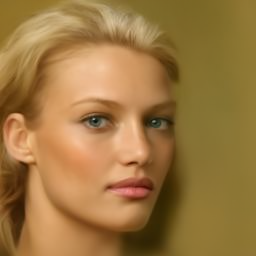

In [35]:
from diffusers import DDPMPipeline
pipeline = DDPMPipeline.from_pretrained("google/ddpm-celebahq-256")
image = pipeline(num_inference_steps=30).images[0]
image

In [36]:
from diffusers import DDPMPipeline, DDPMScheduler, UNet2DModel
scheduler = DDPMScheduler.from_pretrained("google/ddpm-celebahq-256")

In [37]:
model = UNet2DModel.from_pretrained("google/ddpm-celebahq-256", use_safetensors=False).to('cuda')

In [38]:
scheduler.set_timesteps(50)

In [39]:
scheduler.timesteps

tensor([980, 960, 940, 920, 900, 880, 860, 840, 820, 800, 780, 760, 740, 720,
        700, 680, 660, 640, 620, 600, 580, 560, 540, 520, 500, 480, 460, 440,
        420, 400, 380, 360, 340, 320, 300, 280, 260, 240, 220, 200, 180, 160,
        140, 120, 100,  80,  60,  40,  20,   0])

In [40]:
import torch

In [41]:
sample_size = model.config.sample_size

In [42]:
sample_size

256

In [43]:
image.size

(256, 256)

In [44]:
noise = torch.randn((1, 3, sample_size, sample_size)).to('cuda')

In [45]:
input = noise

In [46]:
for t in scheduler.timesteps:
    with torch.no_grad():
        noisy_residual = model(input,t).sample
    previous_noisy_sample = scheduler.step(noisy_residual,t,input).prev_sample
    input = previous_noisy_sample

In [47]:
input.shape

torch.Size([1, 3, 256, 256])

In [48]:
from PIL import Image
import numpy as np

In [49]:
image = (input /2 +0.5).clamp(0,1).squeeze()

In [50]:
image = (image.permute(1,2,0)*255).round().to(torch.uint8).cpu().numpy()

In [51]:
image = Image.fromarray(image)

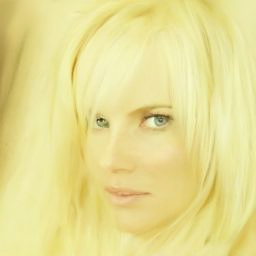

In [52]:
image